In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
colnames = ["sepal length", "sepal width", "petal length" , "petal width", "class"]
df = pd.read_csv("iris.data", names= colnames)
df["class"].value_counts()
df["class"] = df["class"].map({"Iris-setosa": "setosa",
                               "Iris-virginica": "virginica",
                                "Iris-versicolor": "versicolor"})

#df.isnull().sum().sum() Zero NaN values in the dataframe
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


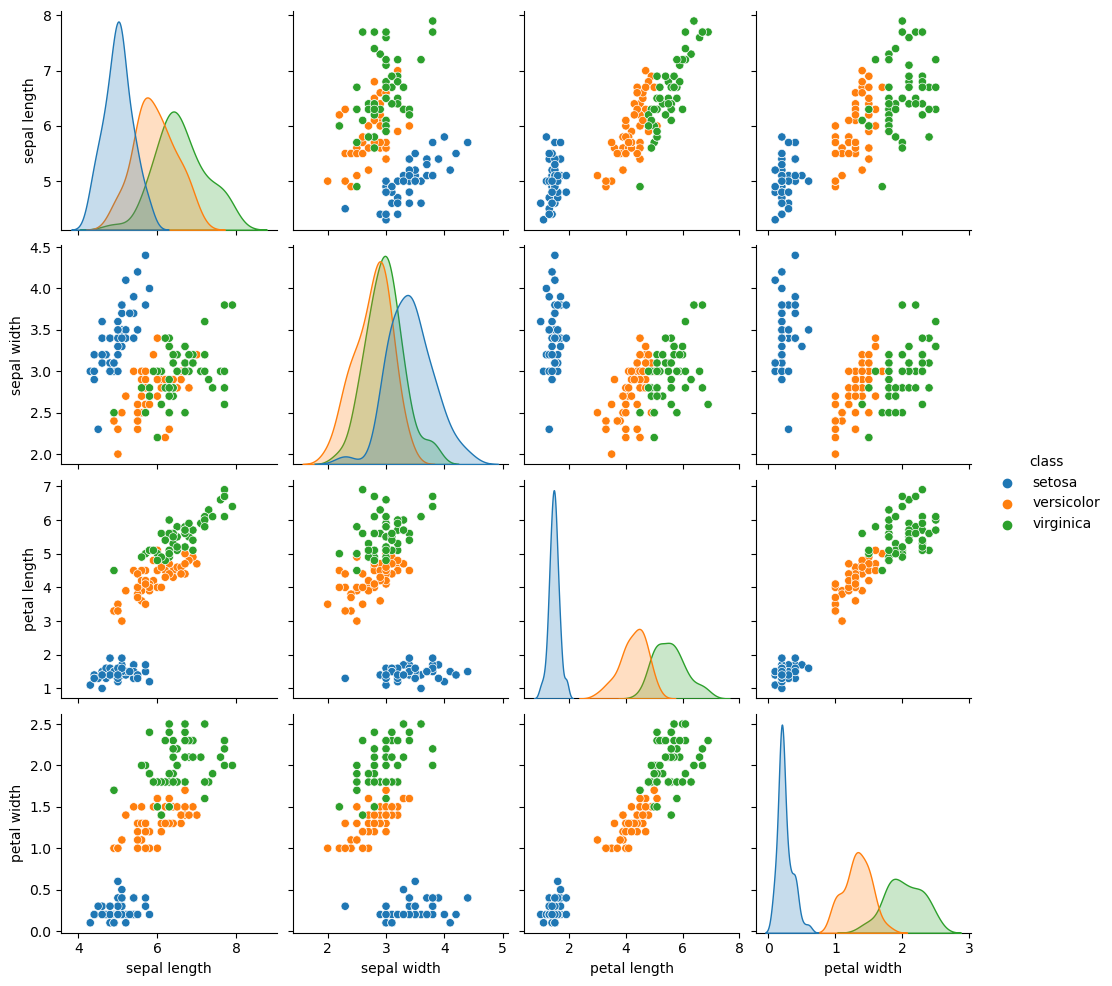

In [3]:
sns.pairplot(data=df, hue="class")

In [4]:
features = colnames[:-1]
X = df[features]
y = df["class"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train,)

LinearSVC(max_iter=10000)

In [7]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

Text(0.5, 427.9555555555555, 'Prediction Label')

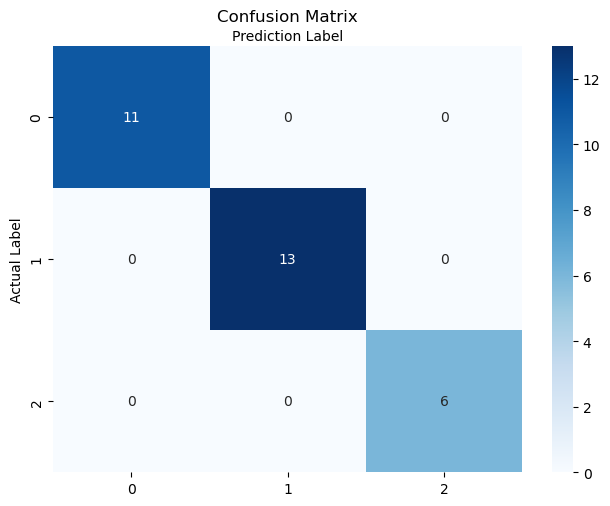

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Prediction Label")

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.9666666666666668